In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# <font color="blue"> Data Collection and preprocessing

In [2]:
#reading the data
sales=pd.read_csv("advertising.csv")
sales.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
sales.size

800

In [5]:
sales.shape

(200, 4)

In [6]:
sales.isnull().any()

TV           False
Radio        False
Newspaper    False
Sales        False
dtype: bool

In [7]:
sales.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

# <font color="blue"> Data Analysis

In [8]:
#checking the description of data
sales.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


# <font color="blue"> Data Visualization

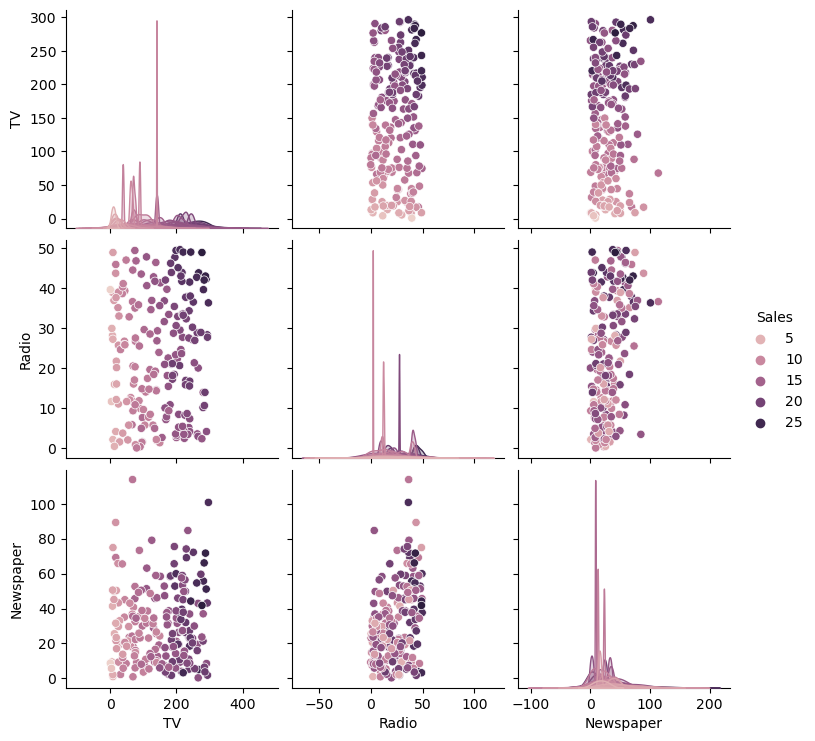

In [9]:
#pairplot of dataset
sns.pairplot(data=sales,hue="Sales")
plt.show()

In [10]:
corr=sales.corr()
corr

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


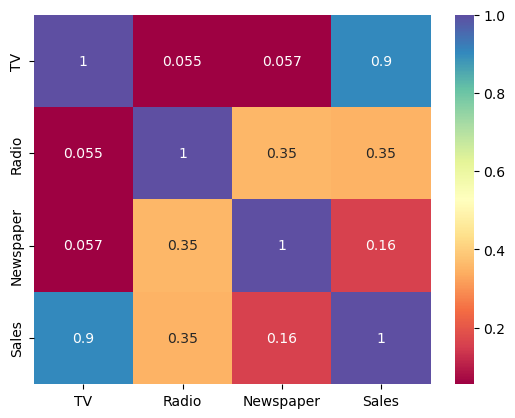

In [11]:
sns.heatmap(corr,cmap="Spectral",annot=True)
plt.show()

<Axes: >

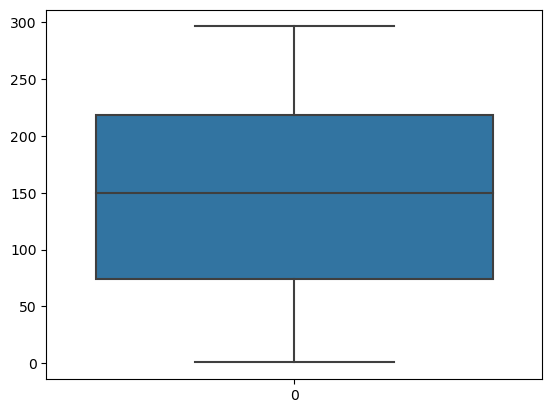

In [12]:
sns.boxplot(sales["TV"])

<Axes: >

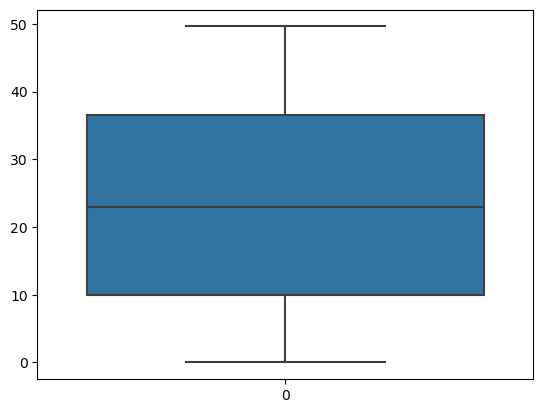

In [13]:
sns.boxplot(sales["Radio"])

<Axes: >

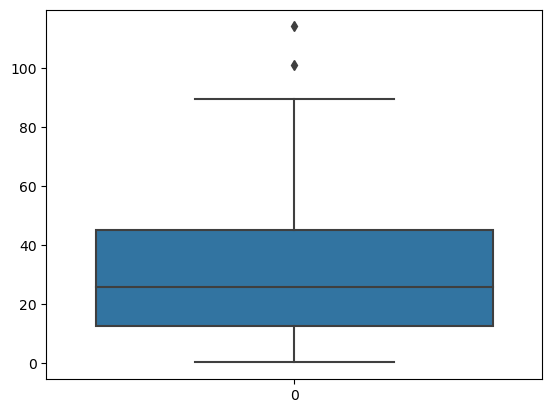

In [14]:
sns.boxplot(sales["Newspaper"])

<Axes: >

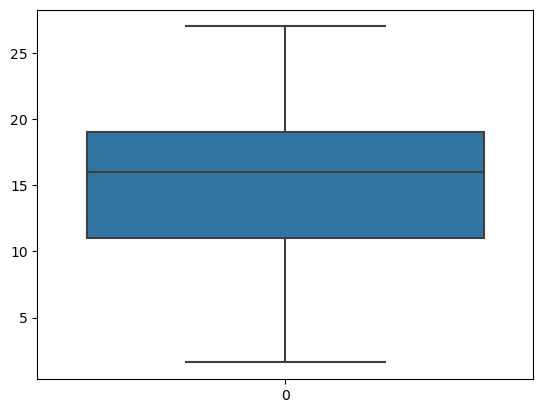

In [15]:
sns.boxplot(sales["Sales"])

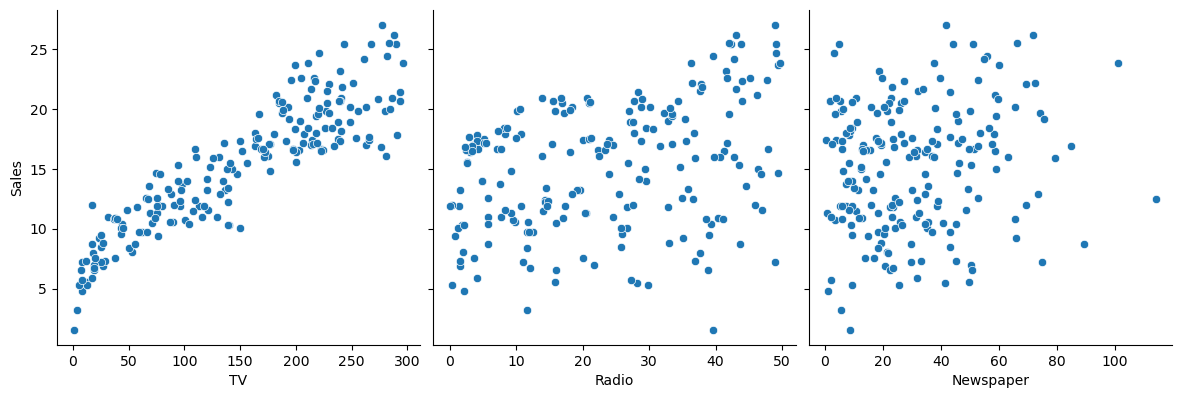

In [16]:
sns.pairplot(sales,x_vars=["TV","Radio","Newspaper"],y_vars=["Sales"],height=4,aspect=1,kind="scatter")
plt.show()

In [17]:
sales["Sales"].value_counts()

11.9    5
16.7    5
20.7    4
11.0    3
11.3    3
       ..
13.4    1
24.2    1
8.1     1
5.5     1
25.5    1
Name: Sales, Length: 121, dtype: int64

In [18]:
sales["Sales"].describe()

count    200.000000
mean      15.130500
std        5.283892
min        1.600000
25%       11.000000
50%       16.000000
75%       19.050000
max       27.000000
Name: Sales, dtype: float64

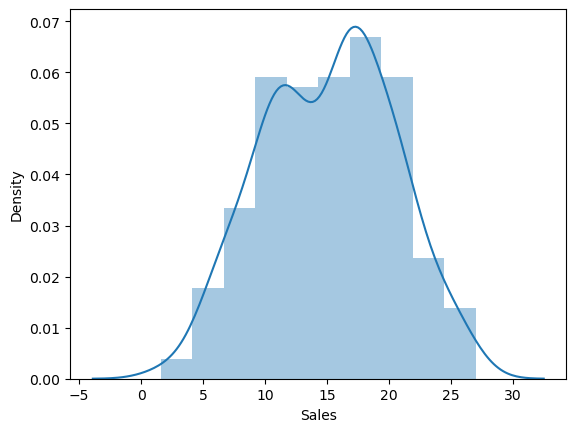

In [19]:
sns.distplot(sales["Sales"])
plt.show()

# Method 1

In [20]:
#regular using all the features

In [21]:
sales.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [22]:
X=sales[['TV', 'Radio', 'Newspaper']]

In [23]:
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [24]:
Y=sales["Sales"]

In [25]:
Y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

# <font color="blue"> Splitting data into training and testing

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [28]:
X_train.shape,X_test.shape

((160, 3), (40, 3))

In [29]:
Y_train.shape,Y_test.shape

((160,), (40,))

# <font color="blue"> Models Training

## Linear Regresssion

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)

LinearRegression()

In [32]:
lin_score=print(lin_reg.score(X_train,Y_train))

0.9001416005862131


In [33]:
y_pred_lin=lin_reg.predict(X_test)

In [34]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [35]:
r2_score_lin=r2_score(Y_test,y_pred_lin)
r2_score_lin

0.9059011844150826

In [36]:
mse_lin=mean_squared_error(Y_test,y_pred_lin)
mse_lin

2.9077569102710923

In [37]:
rmse_lin=np.sqrt(mse_lin)
rmse_lin

1.7052146229349232

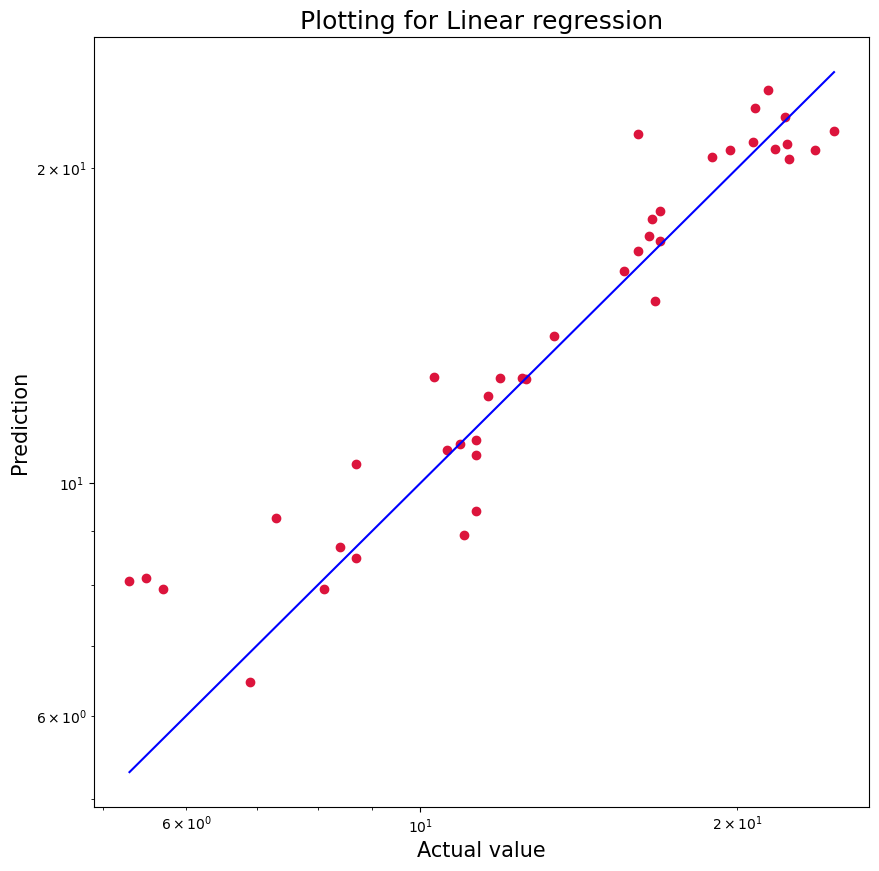

In [38]:
plt.figure(figsize=(10,10))
plt.scatter(Y_test,y_pred_lin,c="crimson")
plt.yscale("log")
plt.xscale("log")
p1=max(max(y_pred_lin),max(Y_test))
p2=min(min(y_pred_lin),min(Y_test))
plt.plot([p1,p2],[p1,p2],"b-")
plt.xlabel("Actual value",fontsize=15)
plt.ylabel("Prediction",fontsize=15)
plt.title("Plotting for Linear regression",fontsize=18)
plt.show()

## Random Forest Regressor

In [39]:
from sklearn.ensemble import RandomForestRegressor

In [40]:
rnd_reg=RandomForestRegressor()
rnd_reg.fit(X_train,Y_train)

RandomForestRegressor()

In [41]:
rnd_score=print(rnd_reg.score(X_train,Y_train))

0.9914008242875421


In [42]:
y_pred_rnd=rnd_reg.predict(X_test)

In [43]:
r2_score_rnd=r2_score(Y_test,y_pred_rnd)
r2_score_rnd

0.9506656251719193

In [44]:
mse_rnd=mean_squared_error(Y_test,y_pred_rnd)
mse_rnd

1.5244864500000042

In [45]:
rmse_rnd=np.sqrt(mse_rnd)
rmse_rnd

1.2347009556973723

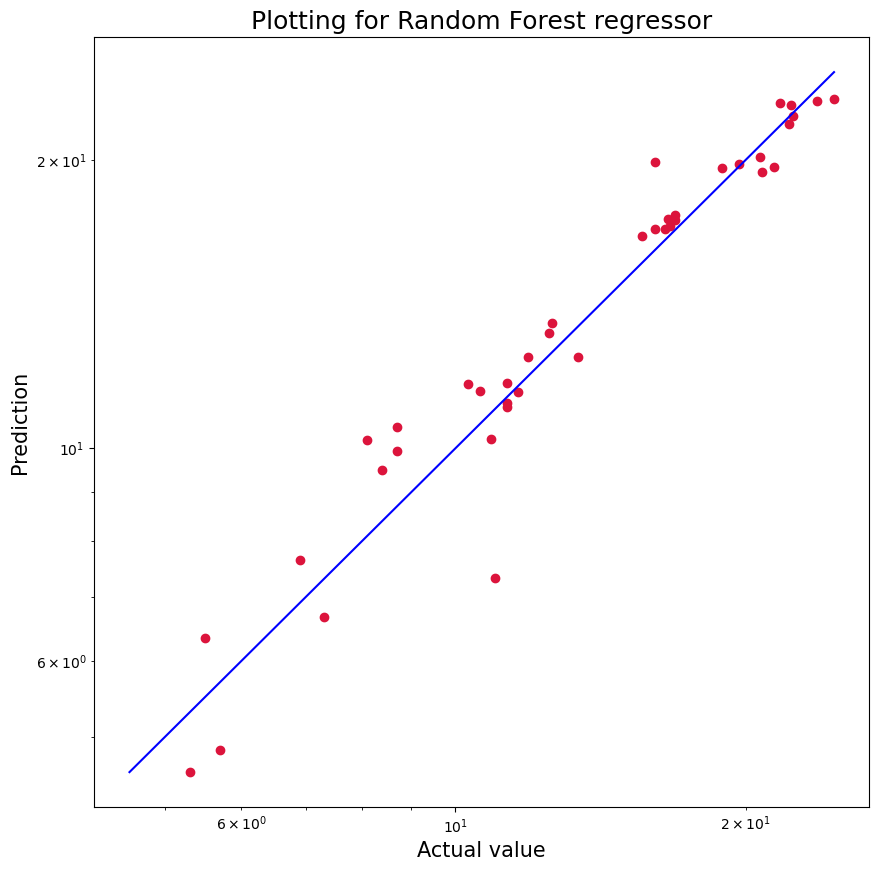

In [46]:
plt.figure(figsize=(10,10))
plt.scatter(Y_test,y_pred_rnd,c="crimson")
plt.yscale("log")
plt.xscale("log")
p1=max(max(y_pred_rnd),max(Y_test))
p2=min(min(y_pred_rnd),min(Y_test))
plt.plot([p1,p2],[p1,p2],"b-")
plt.xlabel("Actual value",fontsize=15)
plt.ylabel("Prediction",fontsize=15)
plt.title("Plotting for Random Forest regressor",fontsize=18)
plt.show()

## Gradiant Boosting Regressor

In [47]:
from sklearn.ensemble import  GradientBoostingRegressor

In [48]:
gar_reg=GradientBoostingRegressor()
gar_reg.fit(X_train,Y_train)

GradientBoostingRegressor()

In [49]:
gar_score=print(gar_reg.score(X_train,Y_train))

0.9932119568614299


In [50]:
y_pred_gar=gar_reg.predict(X_test)

In [51]:
r2_score_gar=r2_score(Y_test,y_pred_gar)
r2_score_gar

0.9594509962643178

In [52]:
mse_gar=mean_squared_error(Y_test,y_pred_gar)
mse_gar

1.2530088193366866

In [53]:
rmse_gar=np.sqrt(mse_gar)
rmse_gar

1.1193787649123448

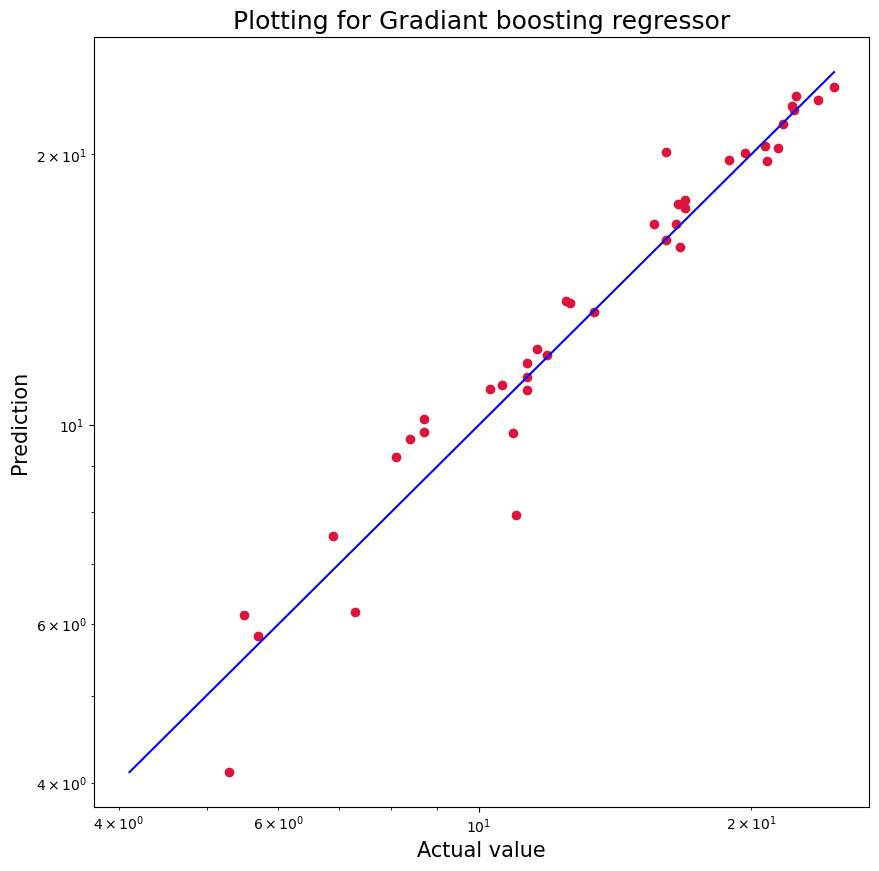

In [54]:
plt.figure(figsize=(10,10))
plt.scatter(Y_test,y_pred_gar,c="crimson")
plt.yscale("log")
plt.xscale("log")
p1=max(max(y_pred_gar),max(Y_test))
p2=min(min(y_pred_gar),min(Y_test))
plt.plot([p1,p2],[p1,p2],"b-")
plt.xlabel("Actual value",fontsize=15)
plt.ylabel("Prediction",fontsize=15)
plt.title("Plotting for Gradiant boosting regressor",fontsize=18)
plt.show()

In [55]:
#compairing the prediction of sales

In [56]:
linear_regression=lin_reg.predict(X)

In [57]:
lin_df=pd.DataFrame({"Pred1":Y,"lin_prediction":linear_regression})
lin_df.head()

,Pred1,lin_prediction
0,22.1,21.372540
1,10.4,11.302524
2,12.0,10.585608
3,16.5,17.395018
4,17.9,15.912873


In [58]:
rnd_regressor=rnd_reg.predict(X)

In [59]:
rnd_df=pd.DataFrame({"Pred1":Y,"rnd_prediction":rnd_regressor})
rnd_df.head()

,Pred1,rnd_prediction
0,22.1,21.990
1,10.4,10.783
2,12.0,10.374
3,16.5,16.722
4,17.9,17.761


In [60]:
gar_regressor=gar_reg.predict(X)

In [61]:
gar_df=pd.DataFrame({"Pred1":Y,"gar_prediction":gar_regressor})
gar_df.head()

,Pred1,gar_prediction
0,22.1,22.171203
1,10.4,10.797260
2,12.0,11.189745
3,16.5,16.977519
4,17.9,17.927487


In [62]:
models=pd.DataFrame({
     "Original_regression":Y,"lin_prediction":linear_regression,
      "rnd_prediction":rnd_regressor,"gar_prediction":gar_regressor})
models.head()

,Original_regression,lin_prediction,rnd_prediction,gar_prediction
0,22.1,21.372540,21.990,22.171203
1,10.4,11.302524,10.783,10.797260
2,12.0,10.585608,10.374,11.189745
3,16.5,17.395018,16.722,16.977519
4,17.9,15.912873,17.761,17.927487


<Axes: >

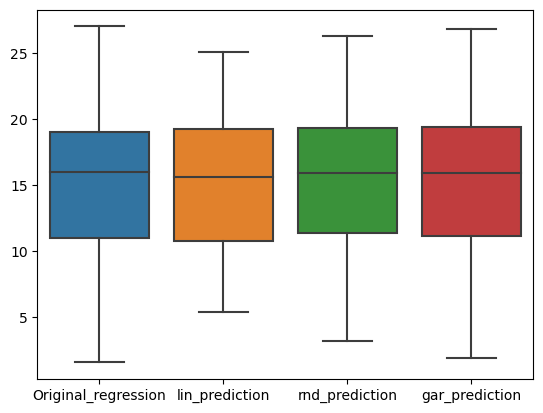

In [63]:
sns.boxplot(models)

# Method 2 

In [64]:
#adding constanst

In [65]:
x=sales["TV"]

In [66]:
x

0      230.1
1       44.5
2       17.2
3      151.5
4      180.8
       ...  
195     38.2
196     94.2
197    177.0
198    283.6
199    232.1
Name: TV, Length: 200, dtype: float64

In [67]:
y=sales["Sales"]

In [68]:
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

# <font color="blue"> Splitting data into training and testing

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [71]:
x_train.shape,x_test.shape

((160,), (40,))

In [72]:
y_train.shape,y_test.shape

((160,), (40,))

In [73]:
x_train.head()

79     116.0
197    177.0
38      43.1
24      62.3
122    224.0
Name: TV, dtype: float64

In [74]:
y_train.head()

79     11.0
197    14.8
38     10.1
24      9.7
122    16.6
Name: Sales, dtype: float64

In [75]:
import statsmodels.api as sm

In [76]:
x_train_sm=sm.add_constant(x_train)
lr=sm.OLS(y_train,x_train_sm).fit()

In [77]:
lr.params

const    7.007108
TV       0.055483
dtype: float64

In [78]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     689.1
Date:                Fri, 28 Jul 2023   Prob (F-statistic):           1.71e-59
Time:                        12:03:46   Log-Likelihood:                -355.76
No. Observations:                 160   AIC:                             715.5
Df Residuals:                     158   BIC:                             721.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0071      0.364     19.274      0.0